In [1]:
import pandas as pd
import cobra
import numpy as np
import matplotlib.pyplot as plt

# Uptake, Sekretion Medium investigation

In [2]:
model_DP = cobra.io.read_sbml_model("models/consistent_DP_SNM.xml")
model_SA = cobra.io.read_sbml_model("models/consistent_iYS854_SNM.xml")
print("Growth: ", model_DP.slim_optimize())
print("Growth: ", model_SA.slim_optimize())

Growth:  0.2823653925322476
Growth:  2.558694612613393


In [3]:
snm3 = pd.read_csv("SNM3.csv", sep =";")
snm3.head()

,Compound,BiGG,ModelSeed,KEGG
0,Alanine,ala__L,cpd00035,C00041
1,Arginine,arg__L,cpd00051,C00062
2,Cysteine,cys__L,cpd00084,C00097
3,Glutamic acid,glu__L,cpd00023,C00025
4,Glycine,gly,cpd00033,C00037


In [4]:
summary_DP = model_DP.summary()
summary_SA = model_SA.summary()

In [5]:
uptake_DP = [id for id in summary_DP.uptake_flux.index if summary_DP.uptake_flux.loc[id]["flux"] > 0]
sekretion_DP = [id for id in summary_DP.secretion_flux.index if summary_DP.secretion_flux.loc[id]["flux"] < 0]
uptake_SA = [id for id in summary_SA.uptake_flux.index if summary_SA.uptake_flux.loc[id]["flux"] > 0]
sekretion_SA = [id for id in summary_SA.secretion_flux.index if summary_SA.secretion_flux.loc[id]["flux"] < 0]

## 1) Shared uptake

We have several shared uptakes

In [6]:
shared_uptake = list(set(uptake_DP).intersection(set(uptake_SA)))
len(shared_uptake)

22

In [7]:
def compute_uptake_flux_relationship(ids, model, h=100, upper_bound=None):
    medium = model.medium.copy()
    fluxes = []
    growths = []
    for up in ids:
        old_f = medium[up]
        flux = np.linspace(old_f,0 , h)
        if not (upper_bound ==None):
            flux = np.linspace(upper_bound,0,h)
        growth = []
        with model:
            for f in flux:
                medium[up] = f
                model.medium = medium 
                growth.append(model.slim_optimize())
            medium[up] = old_f
            fluxes.append(flux)
            growths.append(np.array(growth))
    return fluxes, growths

In [8]:
fluxes_DP, growths_DP = compute_uptake_flux_relationship(shared_uptake, model_DP)
fluxes_SA, growths_SA = compute_uptake_flux_relationship(shared_uptake, model_SA)

In [9]:
# Normalize growth for comparision:
growths_SA = growths_SA/growths_SA[0][0]
growths_DP = growths_DP/growths_DP[0][0]

In [10]:
len(fluxes_SA)

22

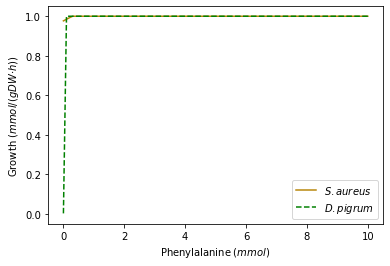

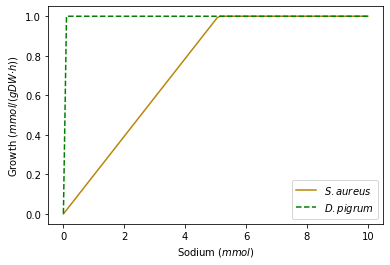

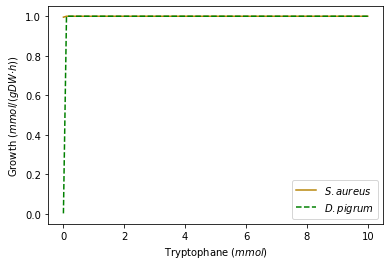

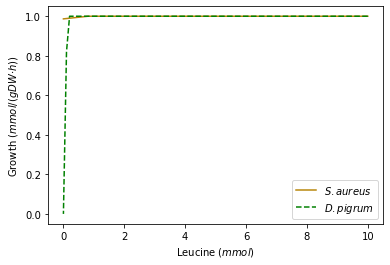

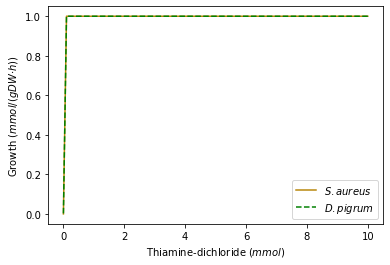

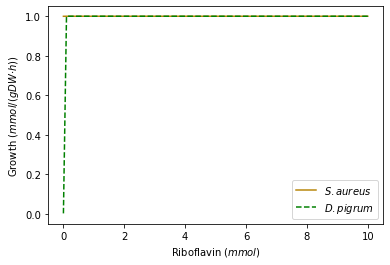

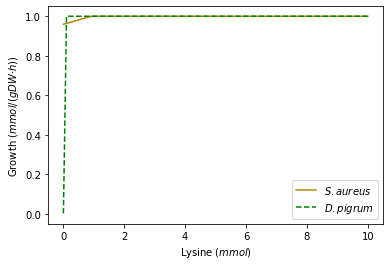

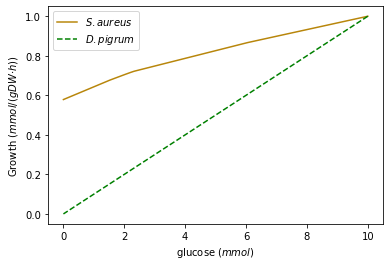

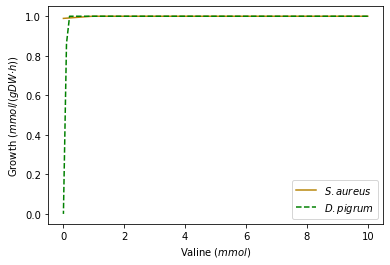

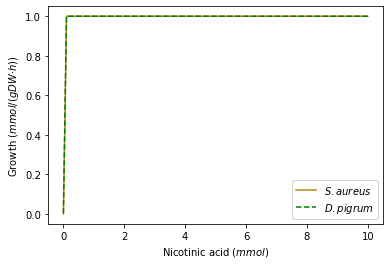

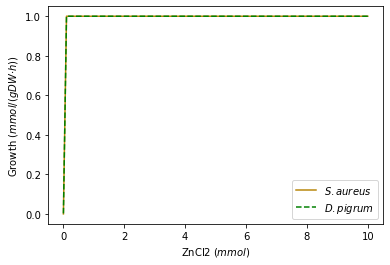

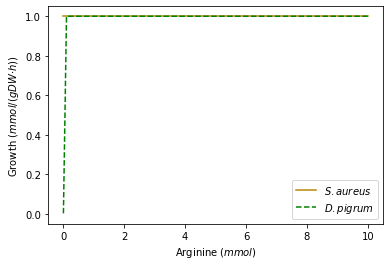

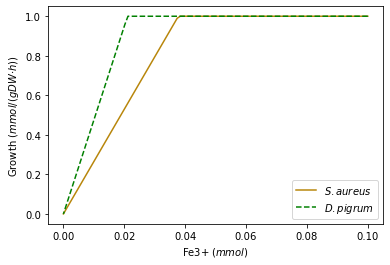

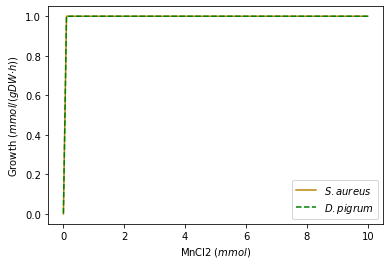

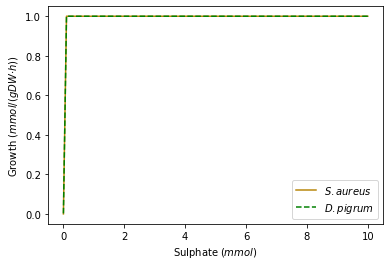

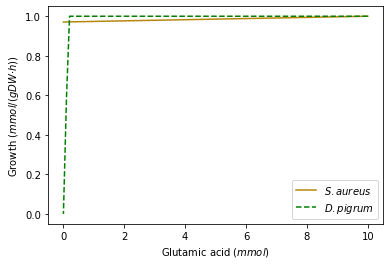

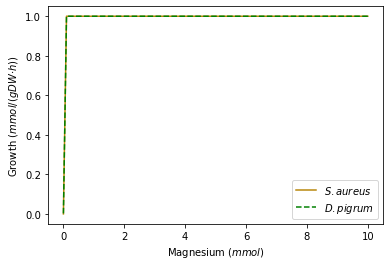

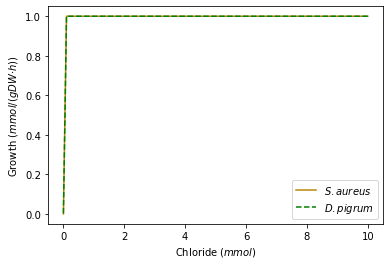

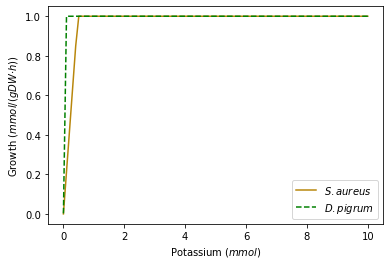

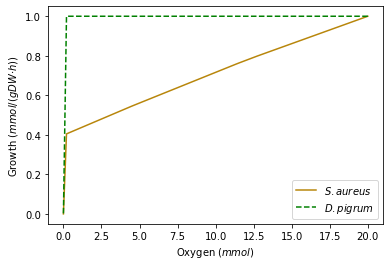

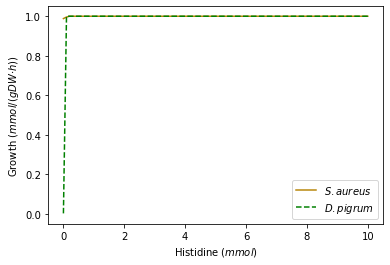

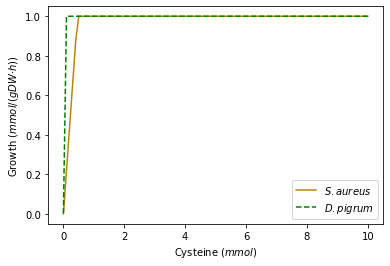

In [211]:
#title_font = {'fontname':'Arial', 'size':'12', 'color':'black', 'weight':'normal'} 
#for i in range(22):
#    for j in range(len(snm3)):
#        ide = "EX_" + str(snm3.iloc[j][1]) + "_e"
#        if ide == shared_uptake[i]:
#            #plt.title('The growth dependency of $\it{D. pigrum}$ and $\it{S.aureus}$ to common uptake reactions', **title_font)
#            plt.plot(fluxes_SA[i], growths_SA[i], 'darkgoldenrod')
#            plt.plot(fluxes_DP[i], growths_DP[i], 'g--')
#            plt.legend(["$\it{S.aureus}$" , "$\it{D. pigrum}$"])
#            plt.xlabel(str(snm3.iloc[j][0]) +  "$\;(\it{mmol})$")
#            plt.ylabel("Growth $(\it{mmol/(gDW⋅h)})$")
#            plt.savefig(shared_uptake[i], bbox_inches='tight', dpi=1000)  
#            plt.show()

## 2) Sekretion DP -> Uptake SA

**NOTE**: We already investigate these relationships. Taking values from the summary e.g. exchange reactions that have nonzero flux during FBA simulation, leads to no such overlaps. Thus we will consider all possible of such pairs! As by definition every uptake (medium reaction) has an upper bound greater then zero, this set of pairs is equivalent to the previous one.

**NOTE**: We increased the upper bound to 13 to investigate if additional material can increase the growth rate!

In [11]:
uptake_DP = [rec.id for rec in model_DP.exchanges if rec.lower_bound < 0]
sekretion_DP = [rec.id for rec in model_DP.exchanges if rec.upper_bound > 0]
uptake_SA = [rec.id for rec in model_SA.exchanges if rec.lower_bound < 0]
sekretion_SA = [rec.id for rec in model_SA.exchanges if rec.upper_bound > 0]

In [12]:
uptake_DP = [id for id in summary_DP.uptake_flux.index if summary_DP.uptake_flux.loc[id]["flux"] > 0]
sekretion_DP = [id for id in summary_DP.secretion_flux.index if summary_DP.secretion_flux.loc[id]["flux"] < 0]
uptake_SA = [id for id in summary_SA.uptake_flux.index if summary_SA.uptake_flux.loc[id]["flux"] > 0]
sekretion_SA = [id for id in summary_SA.secretion_flux.index if summary_SA.secretion_flux.loc[id]["flux"] < 0]

In [13]:
up_sek_DP_SA = []
for sek in sekretion_DP:
    for up in uptake_SA:
        if str(sek) == str(up):
            up_sek_DP_SA.append(str(sek))
up_sek_DP_SA            

['EX_orn_e']

In [14]:
fluxes_SA, growths_SA = compute_uptake_flux_relationship(up_sek_DP_SA, model_SA, upper_bound=0)

In [15]:
#growths_SA = np.array(growths_SA)/model_SA.slim_optimize()
# Normalize growth for comparision:
growths_SA = growths_SA/growths_SA[0][0]
growths_DP = growths_DP/growths_DP[0][0]

In [16]:
fluxes_DP, growths_DP = compute_uptake_flux_relationship(up_sek_DP_SA, model_DP, upper_bound=0)

## 3) Sekretion SA -> Uptake DP

In [18]:
up_sek_SA_DP = []
for sek in sekretion_SA:
    for up in uptake_DP:
        if str(sek) == str(up):
            up_sek_SA_DP.append(str(sek))
up_sek_SA_DP

[]